In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

# /content/drive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
%pwd

'/content/drive/My Drive/Kaggle'

In [ ]:
#Copy the API Command from the Kaggle dataset https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

In [ ]:
#!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

In [ ]:
!ls #Check the files in the Kaggle folder

anno_test.csv  anno_train.csv  car_data  kaggle.json  names.csv


In [ ]:
#the above data is in zip file. So unzip the file and deleting the zip file.
#!unzip \*.zip  && rm *.zip

In [ ]:
!ls

anno_test.csv  anno_train.csv  car_data  kaggle.json  names.csv


In [ ]:
!ls car_data/

car_data


In [ ]:
!ls car_data/car_data/

test  train


In [ ]:
import pathlib
data_dir = pathlib.Path('./car_data/car_data/train')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

8144

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#We dont need test set. We will divide train set into train and validation set. 

ClassNames = pd.read_csv("names.csv")

In [ ]:
ClassNames.head()

,AM General Hummer SUV 2000
0,Acura RL Sedan 2012
1,Acura TL Sedan 2012
2,Acura TL Type-S 2008
3,Acura TSX Sedan 2012
4,Acura Integra Type R 2001


In [ ]:
ClassNames

,AM General Hummer SUV 2000
0,Acura RL Sedan 2012
1,Acura TL Sedan 2012
2,Acura TL Type-S 2008
3,Acura TSX Sedan 2012
4,Acura Integra Type R 2001
...,...
190,Volkswagen Beetle Hatchback 2012
191,Volvo C30 Hatchback 2012
192,Volvo 240 Sedan 1993
193,Volvo XC90 SUV 2007


In [ ]:
ClassNames.shape

(195, 1)

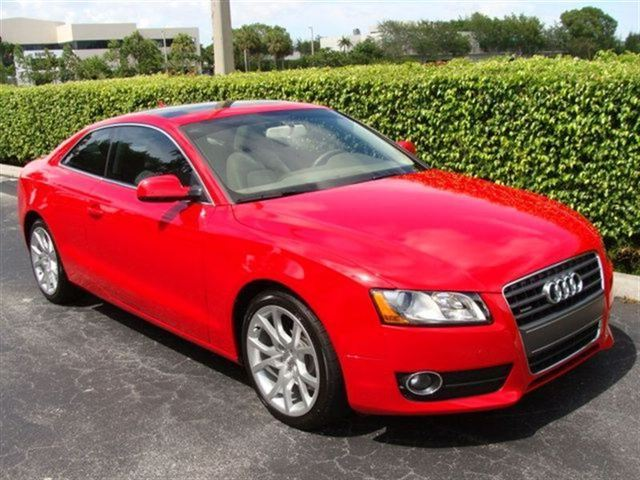

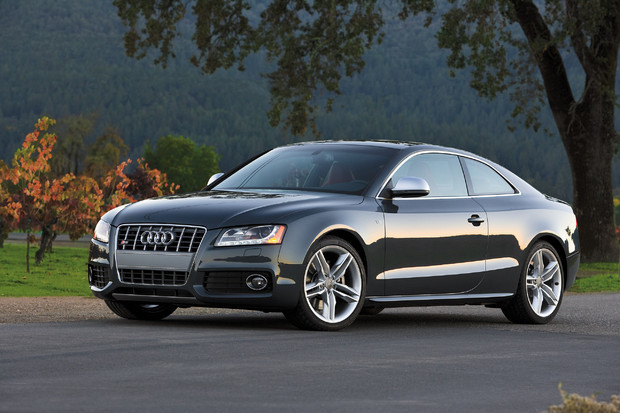

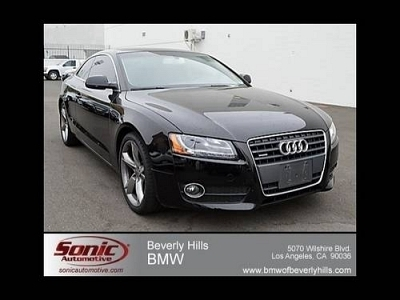

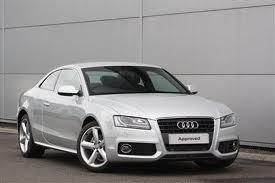

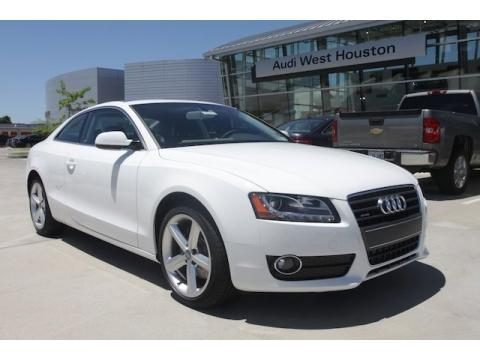

In [ ]:
from IPython.display import Image, display

path = pathlib.Path('./car_data/car_data/train')
Audi = list(data_dir.glob('Audi A5 Coupe 2012/*'))

for image_path in Audi[:5]:
    display(Image(str(image_path)))

In [ ]:
!ls car_data/car_data/train

'Acura Integra Type R 2001'
'Acura RL Sedan 2012'
'Acura TL Sedan 2012'
'Acura TL Type-S 2008'
'Acura TSX Sedan 2012'
'Acura ZDX Hatchback 2012'
'AM General Hummer SUV 2000'
'Aston Martin V8 Vantage Convertible 2012'
'Aston Martin V8 Vantage Coupe 2012'
'Aston Martin Virage Convertible 2012'
'Aston Martin Virage Coupe 2012'
'Audi 100 Sedan 1994'
'Audi 100 Wagon 1994'
'Audi A5 Coupe 2012'
'Audi R8 Coupe 2012'
'Audi RS 4 Convertible 2008'
'Audi S4 Sedan 2007'
'Audi S4 Sedan 2012'
'Audi S5 Convertible 2012'
'Audi S5 Coupe 2012'
'Audi S6 Sedan 2011'
'Audi TT Hatchback 2011'
'Audi TT RS Coupe 2012'
'Audi TTS Coupe 2012'
'Audi V8 Sedan 1994'
'Bentley Arnage Sedan 2009'
'Bentley Continental Flying Spur Sedan 2007'
'Bentley Continental GT Coupe 2007'
'Bentley Continental GT Coupe 2012'
'Bentley Continental Supersports Conv. Convertible 2012'
'Bentley Mulsanne Sedan 2011'
'BMW 1 Series Convertible 2012'
'BMW 1 Series Coupe 2012'
'BMW 3 Series Sedan 2012'
'BMW 3 Series Wagon 2012'
'BMW 6 Series 

In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True
Tensorflow Version:  2.3.0
Keras Version:  2.4.0


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.4.0


In [ ]:
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory #preprocessing directory for data pipelines

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64
dataset_dir = './car_data/car_data/train' #base_directory having training data set

In [ ]:
#We will split train folder into 2 parts as Training dataset and Validation Dataset
#train_dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_dir,
  labels="inferred",
  label_mode="categorical",
  class_names=None,
  color_mode="rgb",
  batch_size=BATCH_SIZE,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  seed=123,
  validation_split=0.2,
  subset="training",
  )

Found 8144 files belonging to 196 classes.
Using 6516 files for training.


In [ ]:
#Validation dataset

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_dir,
  labels="inferred",
  label_mode="categorical",
  class_names=None,
  color_mode="rgb",
  batch_size=BATCH_SIZE,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  seed=123,
  validation_split=0.2,
  subset="validation",
  )

Found 8144 files belonging to 196 classes.
Using 1628 files for validation.


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(train_dataset))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(val_dataset))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.003921569


In [ ]:

#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
#val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
#test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
image_batch_train, label_batch_train = next(iter(train_dataset))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)


#Label batch shape should be (64,196)

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 196)


In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
CLASS_NAMES

array(['AM General Hummer SUV 2000', 'Acura Integra Type R 2001',
       'Acura RL Sedan 2012', 'Acura TL Sedan 2012',
       'Acura TL Type-S 2008', 'Acura TSX Sedan 2012',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994',
       'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007',
       'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012',
       'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011',
       'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012',
       'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW M3 Coupe 2012', 'BMW

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(5):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n].numpy().astype("uint8"))
      plt.title(CLASS_NAMES[label_batch[n]==1][0])
      plt.axis('off')
      

In [ ]:
print(label_batch_train)


tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 196), dtype=float32)


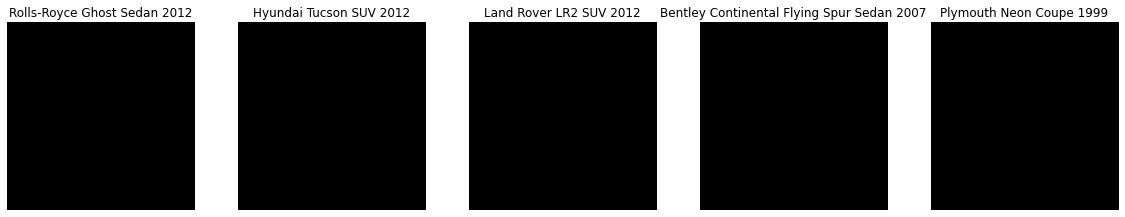

In [ ]:
show_batch(image_batch_train, label_batch_train)

In [ ]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
#.cache() will keep the data in the memory after first epoch for faster memory access.
#.prefetch() will fetch the next batch when current batch is being processed.

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:

print(len(CLASS_NAMES))

196


# Model 0

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
numclasses= len(CLASS_NAMES)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(numclasses, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_dataset,
      #steps_per_epoch=steps_per_epoch,
      epochs=100,
      validation_data=val_dataset)
      #validation_steps=val_steps_per_epoch)

Epoch 1/100
102/102 [==============================] - 2932s 29s/step - loss: 5.2751 - acc: 0.0068 - val_loss: 5.2783 - val_acc: 0.0025
Epoch 2/100
102/102 [==============================] - 11s 107ms/step - loss: 5.1673 - acc: 0.0144 - val_loss: 5.2806 - val_acc: 0.0018
Epoch 3/100
102/102 [==============================] - 11s 109ms/step - loss: 4.9524 - acc: 0.0359 - val_loss: 5.2867 - val_acc: 0.0061
Epoch 4/100
102/102 [==============================] - 11s 108ms/step - loss: 4.6018 - acc: 0.0735 - val_loss: 5.2942 - val_acc: 0.0055
Epoch 5/100
102/102 [==============================] - 11s 107ms/step - loss: 4.0913 - acc: 0.1475 - val_loss: 5.2990 - val_acc: 0.0055
Epoch 6/100
102/102 [==============================] - 11s 106ms/step - loss: 3.4475 - acc: 0.2475 - val_loss: 5.3032 - val_acc: 0.0055
Epoch 7/100
102/102 [==============================] - 11s 106ms/step - loss: 2.7102 - acc: 0.3887 - val_loss: 5.3067 - val_acc: 0.0049
Epoch 8/100
102/102 [===========================

In [ ]:
history.history

{'acc': [0.006752608809620142,
  0.014426028355956078,
  0.03591160103678703,
  0.07351135462522507,
  0.14748312532901764,
  0.24754451215267181,
  0.38873541355133057,
  0.5567833185195923,
  0.7194597721099854,
  0.8431553244590759,
  0.9146715998649597,
  0.945979118347168,
  0.9541129469871521,
  0.9676181674003601,
  0.9736034274101257,
  0.9766728281974792,
  0.978821337223053,
  0.9838858246803284,
  0.9844996929168701,
  0.986494779586792,
  0.9871086478233337,
  0.9860343933105469,
  0.9883363842964172,
  0.9903314709663391,
  0.992326557636261,
  0.9910988211631775,
  0.9937077760696411,
  0.9967771768569946,
  0.9946286082267761,
  0.9938612580299377,
  0.9952424764633179,
  0.9950889945030212,
  0.9937077760696411,
  0.995702862739563,
  0.9960098266601562,
  0.9964702129364014,
  0.9940147399902344,
  0.9953959584236145,
  0.9973910450935364,
  0.9972375631332397,
  0.9984652996063232,
  0.9987722635269165,
  0.9973910450935364,
  0.9981583952903748,
  0.9978514313697815,

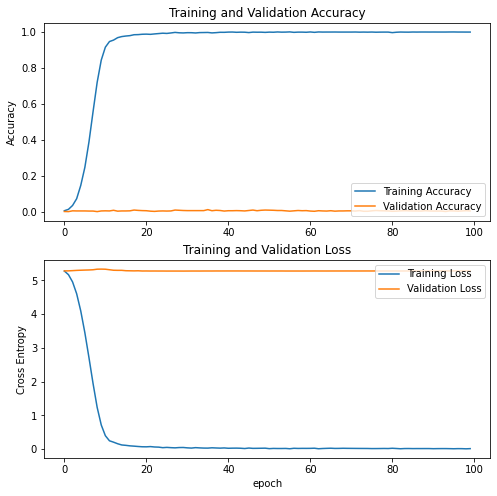

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Model 1

In [ ]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMAGE_SIZE, 
                                                              IMAGE_SIZE,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

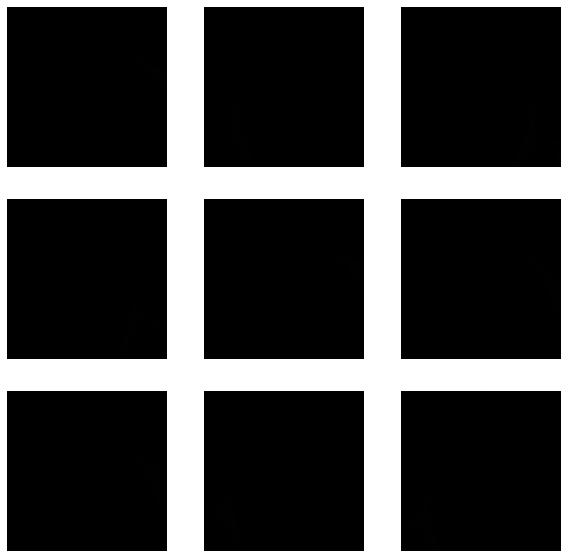

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
numclasses= len(CLASS_NAMES)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(numclasses)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)       

In [ ]:
epochs = 50
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/50
102/102 [==============================] - 8s 80ms/step - loss: 9.3895 - accuracy: 0.0054 - val_loss: 6.7720 - val_accuracy: 0.0074
Epoch 2/50
102/102 [==============================] - 8s 75ms/step - loss: 8.4794 - accuracy: 0.0052 - val_loss: 6.7720 - val_accuracy: 0.0074
Epoch 3/50
102/102 [==============================] - 8s 75ms/step - loss: 7.7849 - accuracy: 0.0052 - val_loss: 9.3931 - val_accuracy: 0.0074
Epoch 4/50
102/102 [==============================] - 8s 74ms/step - loss: 8.4788 - accuracy: 0.0052 - val_loss: 7.0487 - val_accuracy: 0.0074
Epoch 5/50
102/102 [==============================] - 8s 74ms/step - loss: 8.5040 - accuracy: 0.0052 - val_loss: 9.3461 - val_accuracy: 0.0074
Epoch 6/50
102/102 [==============================] - 8s 74ms/step - loss: 8.5320 - accuracy: 0.0052 - val_loss: 6.7720 - val_accuracy: 0.0074
Epoch 7/50
102/102 [==============================] - 8s 74ms/step - loss: 8.4879 - accuracy: 0.0052 - val_loss: 9.3549 - val_accuracy: 0.0074

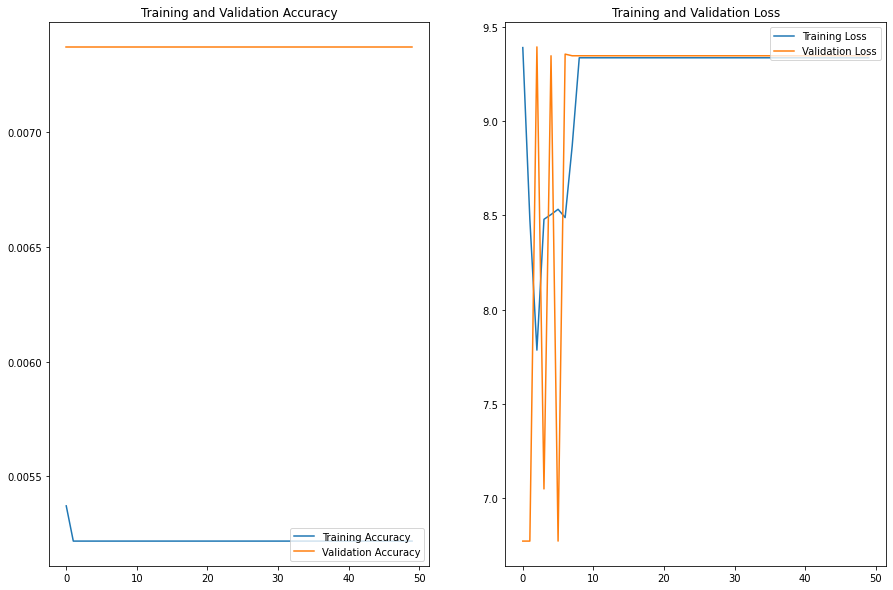

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 2

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model1 = tf.keras.Sequential([
  base_model,
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(numclasses, activation='softmax')
])

In [ ]:
import tensorflow_hub as hub

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=False)

In [ ]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(numclasses)
])
model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_5 (Dense)              (None, 196)               251076    
Total params: 2,509,060
Trainable params: 251,076
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam', 
    loss = 'categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
steps_per_epoch = np.ceil(len(train_dataset)/BATCH_SIZE)
val_steps_per_epoch = np.ceil(len(val_dataset)/BATCH_SIZE)

In [ ]:
EPOCHS = 10
history1 = model.fit(train_dataset, 
                    #steps_per_epoch=steps_per_epoch, 
                    epochs=EPOCHS, 
                    validation_data=val_dataset)
                    #validation_steps=val_steps_per_epoch)

Epoch 1/10
102/102 [==============================] - 10s 96ms/step - loss: 9.4163 - accuracy: 0.0121 - val_loss: 8.9987 - val_accuracy: 0.0049
Epoch 2/10
102/102 [==============================] - 9s 88ms/step - loss: 9.4197 - accuracy: 0.0270 - val_loss: 8.5690 - val_accuracy: 0.0049
Epoch 3/10
102/102 [==============================] - 9s 87ms/step - loss: 9.5863 - accuracy: 0.0333 - val_loss: 8.8413 - val_accuracy: 0.0049
Epoch 4/10
102/102 [==============================] - 9s 86ms/step - loss: 10.1202 - accuracy: 0.0364 - val_loss: 8.5492 - val_accuracy: 0.0031
Epoch 5/10
102/102 [==============================] - 9s 86ms/step - loss: 10.0434 - accuracy: 0.0382 - val_loss: 8.8873 - val_accuracy: 0.0037
Epoch 6/10
102/102 [==============================] - 9s 86ms/step - loss: 9.8996 - accuracy: 0.0390 - val_loss: 8.5198 - val_accuracy: 0.0043
Epoch 7/10
102/102 [==============================] - 9s 85ms/step - loss: 9.6845 - accuracy: 0.0414 - val_loss: 8.5343 - val_accuracy: 0.0

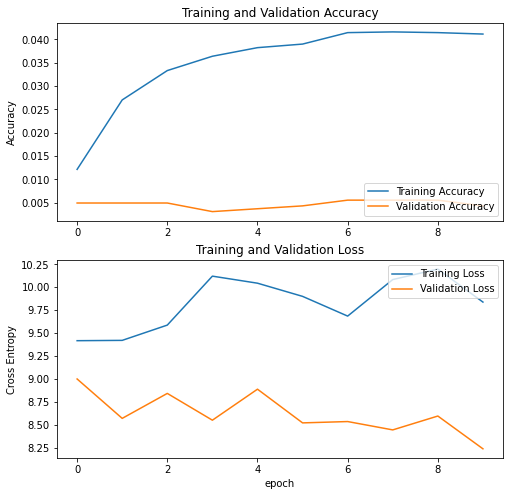

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Model 3

In [ ]:
from keras import regularizers
model3 = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", 
                 output_shape=[1001],
                 trainable=False),
  tf.keras.layers.Dropout(0.5),#0.4
  tf.keras.layers.Dense(64, kernel_regularizer=regularizers.l2(0.03), activation='relu'),#0.01
  tf.keras.layers.Dense(numclasses, activation='softmax')
])
model3.build([None, 224, 224, 3])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                64128     
_________________________________________________________________
dense_7 (Dense)              (None, 196)               12740     
Total params: 23,930,701
Trainable params: 76,868
Non-trainable params: 23,853,833
_________________________________________________________________


In [ ]:
model3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

#steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
#val_steps_per_epoch = np.ceil(val_generator.samples/val_generator.batch_size)

history3 = model3.fit(
    train_dataset, 
    epochs=10,
    verbose=1,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset).history
    #validation_steps=val_steps_per_epoch

Epoch 1/10
102/102 [==============================] - 20s 198ms/step - loss: 7.3599 - acc: 0.0173 - val_loss: 6.2702 - val_acc: 0.0068
Epoch 2/10
102/102 [==============================] - 18s 173ms/step - loss: 5.0884 - acc: 0.0648 - val_loss: 5.7427 - val_acc: 0.0061
Epoch 3/10
102/102 [==============================] - 17s 167ms/step - loss: 4.2549 - acc: 0.1156 - val_loss: 5.6838 - val_acc: 0.0061
Epoch 4/10
102/102 [==============================] - 17s 166ms/step - loss: 3.9423 - acc: 0.1590 - val_loss: 5.6893 - val_acc: 0.0068
Epoch 5/10
102/102 [==============================] - 17s 169ms/step - loss: 3.7796 - acc: 0.1868 - val_loss: 5.7038 - val_acc: 0.0061
Epoch 6/10
102/102 [==============================] - 17s 171ms/step - loss: 3.6630 - acc: 0.2095 - val_loss: 5.7196 - val_acc: 0.0080
Epoch 7/10
102/102 [==============================] - 17s 170ms/step - loss: 3.5780 - acc: 0.2307 - val_loss: 5.7270 - val_acc: 0.0068
Epoch 8/10
102/102 [==============================] - 1

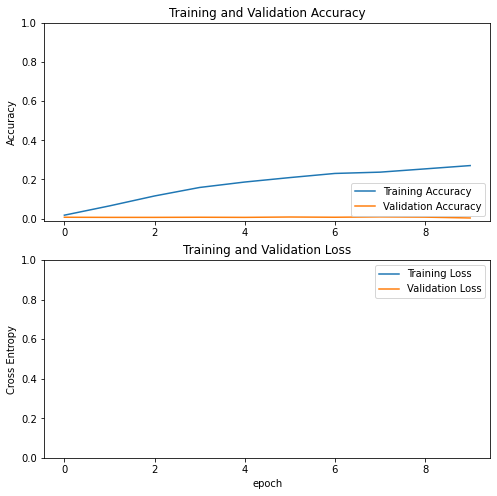

In [ ]:
acc = history3['acc']
val_acc = history3['val_acc']

loss = history3['loss']
val_loss = history3['val_loss']

myfig=plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Model 4

In [ ]:
numclasses=5
def create_model0():
    pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False, weights='imagenet')
    #pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.Xception(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
    #pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    #pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    # EfficientNet can be loaded through efficientnet.tfkeras library (https://github.com/qubvel/efficientnet)
    #pretrained_model = efficientnet.tfkeras.EfficientNetB0(weights='imagenet', include_top=False)
    
    pretrained_model.trainable = False #True

    # model = tf.keras.Sequential([
    #     pretrained_model,
    #     tf.keras.layers.Conv2D(32, 3, activation='relu'),
    #     tf.keras.layers.Flatten(),
    #     tf.keras.layers.Dropout(0.5),
    #     tf.keras.layers.Dense(5, activation='softmax')
    #     # tf.keras.layers.Conv2D(32, 3, activation='relu'),
    #     # tf.keras.layers.Dropout(0.5),
    #     # tf.keras.layers.GlobalAveragePooling2D(),
    #     # tf.keras.layers.Dense(numclasses, activation='softmax')
    # ])

    model = tf.keras.Sequential([
        pretrained_model,
        #tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(numclasses, activation='softmax')
        # tf.keras.layers.Conv2D(32, 3, activation='relu'),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.GlobalAveragePooling2D(),
        # tf.keras.layers.Dense(numclasses, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        #loss = 'categorical_crossentropy',
        loss = 'sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:


EPOCHS=10
history0 = model.fit(train_dataset, #steps_per_epoch=steps_per_epoch, 
                      epochs=EPOCHS,
                    validation_data=val_dataset) #validation_steps=validation_steps)

Epoch 1/10
102/102 [==============================] - 9s 86ms/step - loss: 9.7645 - accuracy: 0.0381 - val_loss: 8.2173 - val_accuracy: 0.0061
Epoch 2/10
102/102 [==============================] - 9s 87ms/step - loss: 9.5213 - accuracy: 0.0402 - val_loss: 8.5210 - val_accuracy: 0.0074
Epoch 3/10
102/102 [==============================] - 9s 87ms/step - loss: 9.7392 - accuracy: 0.0359 - val_loss: 8.8044 - val_accuracy: 0.0055
Epoch 4/10
102/102 [==============================] - 9s 87ms/step - loss: 9.8899 - accuracy: 0.0368 - val_loss: 8.7825 - val_accuracy: 0.0055
Epoch 5/10
102/102 [==============================] - 9s 86ms/step - loss: 9.6402 - accuracy: 0.0410 - val_loss: 8.9347 - val_accuracy: 0.0055
Epoch 6/10
102/102 [==============================] - 9s 86ms/step - loss: 9.8092 - accuracy: 0.0424 - val_loss: 8.6600 - val_accuracy: 0.0055
Epoch 7/10
102/102 [==============================] - 9s 86ms/step - loss: 10.1552 - accuracy: 0.0445 - val_loss: 8.6304 - val_accuracy: 0.005

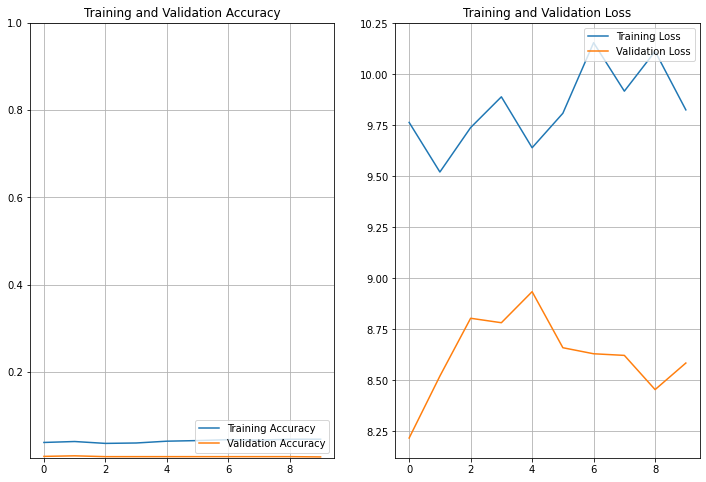

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

plot_history(history0, 'accuracy', 'val_accuracy')